In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import sys
sys.path.append("/home/ahmet/deep-active-learning-2")

/home/ahmet/deep-active-learning-2


In [52]:
# import pandas as pd

# df1 = pd.read_csv("kpn-train.csv")
# df2 = pd.read_csv("kpn-test.csv")
# df3 = pd.read_csv("kpn-valid.csv")

# df = pd.concat([df1, df2, df3])
# df.to_csv("kpn.csv", index=False)

In [64]:
# df = pd.read_csv("kpn.csv")
# df.value_counts('dialogue_acts')

# # ['explore problem']            19966

# {
#     "back office_answer": "back_office",
#     "transfer_answer": "transfer",
#     "consultation_answer": "consultation",
#     "mechanic planned": "PPL",
#     "mechanic planned_answer": "PPL",
#     "will try solution": "suggest_solution",
# }

dialogue_acts
['NDS']                        33104
['customer recognition']       28321
['explore problem']            19966
['my problem is']              16428
['will try solution']           8336
['following_procedure']         6873
['suggest solution']            6618
['farewell']                    6022
['greeting']                    5914
['follow procedure']            4892
['consultation_answer']         3340
['consultation']                2806
['mechanic planned_answer']     2472
['mechanic planned']            2203
['transfer']                    1634
['transfer_answer']             1503
['solved']                       876
['back office_answer']           777
['back office']                  742
dtype: int64

In [16]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, Dataset

def convert_kpn_data():
    # read the csv
    df = pd.read_csv("kpn.csv", index_col=0)

    df = df.reset_index(drop=True)
    
    # drop the unnecessary columns 
    df = df.drop(columns=['segments', 'actor_id'])
    
    # remove the brackets from the dialogue acts
    df['dialogue_acts'] = df['dialogue_acts'].apply(lambda x: x.strip("[]"))
    
    # encode the labels
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['dialogue_acts'])

    print(le.classes_)

    # sort the turns by turn order
    df = df.groupby("conversation_id", group_keys=True).apply(lambda x: x.sort_values(by=['order'])).reset_index(drop=True)

    # create the nested structure
    df = df.groupby("conversation_id").agg(list)

    display(df)
    
    # remove the conversations with more than 4000 tokens
    total_length = lambda text_list: sum([len(text) for text in text_list])
    df = df[df['text'].apply(total_length) / 4 < 4000]

    # split the data into train and test
    train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
    print(train_data.shape, test_data.shape)

    # create the dataset dict
    train_dataset = Dataset.from_pandas(train_data)
    test_dataset = Dataset.from_pandas(test_data)
    dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})

    os.makedirs("data/kpn", exist_ok=True)
    dataset_dict.save_to_disk("data/kpn")

convert_kpn_data()

["'NDS'" "'back office'" "'back office_answer'" "'consultation'"
 "'consultation_answer'" "'customer recognition'" "'explore problem'"
 "'farewell'" "'follow procedure'" "'following_procedure'" "'greeting'"
 "'mechanic planned'" "'mechanic planned_answer'" "'my problem is'"
 "'solved'" "'suggest solution'" "'transfer'" "'transfer_answer'"
 "'will try solution'"]


,order,text,dialogue_acts,label
conversation_id,,,,
20201123_080634_SQKV,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[goedemorgen kpn, goeiedag met essen bedjes ik...","['greeting', 'my problem is', 'customer recogn...","[10, 13, 5, 5, 5, 5, 5, 5, 0, 5, 5, 13, 16, 7,..."
20201123_082708_SRRD,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[morgen zou dat zo is, goedemorgen met uh alle...","['mechanic planned', 'my problem is', 'explore...","[11, 13, 6, 5, 0, 5, 13, 13, 5, 0, 0, 0, 0, 0,..."
20201123_084904_STVW,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[die. goedemorgen met ... van kpn zakelijk waa...,"['greeting', 'greeting', 'NDS', 'my problem is...","[10, 10, 0, 13, 5, 0, 5, 5, 5, 13, 6, 13, 6, 1..."
20201123_085032_SUAJ,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[zo. je bent u dat al ja daarom. niet. nou als...,"['NDS', 'greeting', 'my problem is', 'greeting...","[0, 10, 13, 10, 0, 5, 5, 3, 4, 5, 0, 5, 5, 5, ..."
20201123_092336_SYUH,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[dat zou .... ja. worden opgenomen, goedemorge...","['NDS', 'greeting', 'my problem is', 'greeting...","[0, 10, 13, 10, 5, 0, 0, 5, 5, 5, 0, 0, 5, 0, ..."
...,...,...,...,...
20210117_132830_RXSH,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[goedemiddag kpn kleinzakelijk u spreekt met u...,"['greeting', 'greeting', 'customer recognition...","[10, 10, 5, 0, 0, 5, 0, 0, 0, 0, 13, 6, 13, 3,..."
20210117_151715_SCKP,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[een goede middag kpn receptie ... cardiff waa...,"['greeting', 'my problem is', 'customer recogn...","[10, 13, 5, 5, 5, 5, 5, 0, 5, 0, 5, 5, 5, 0, 0..."
20210117_152258_JIDJ,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[een hele goeie dag met kpn kleinzakelijk, ja ...","['greeting', 'my problem is', 'follow procedur...","[10, 13, 8, 9, 9, 10, 0, 8, 8, 13, 8, 7, 7]"


(2163, 4) (241, 4)


Saving the dataset (0/1 shards):   0%|          | 0/2163 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/241 [00:00<?, ? examples/s]

In [5]:
from data import get_KPN
train, test = get_SWDA()
print(len(train[0]), len(test[0]))

Dataset loaded from disk
2163 241


In [22]:
import numpy as np
a = np.concatenate(test[1])
b = pd.DataFrame(a)
b.value_counts()

0     2731
5     2428
6     1589
13    1357
18     652
7      595
10     546
15     514
9      511
8      384
3      211
4      201
12     184
16     166
11     164
17     150
14      85
1       60
2       52
dtype: int64

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datasets import DatasetDict, Dataset
import os
from sklearn.model_selection import train_test_split

def convert_kpn_data_old():
    # read the csv
    df = pd.read_csv("kpn.csv")

    # drop unnecessary columns
    df = df.drop(columns=['turn_length', 'turn_order_relative', 'channel', 'Person', 'Label', 'probs', 'actor_num'])
    
    # filter out dialogues with weird dialogue ids
    df = df[df['Dialogue ID'].str.count('_') == 2]

    # encode the labels
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['label_num'])

    print(le.classes_)

    # sort the turns by turn order
    df = df.groupby("Dialogue ID").apply(lambda x: x.sort_values(by=['turn_order'])).reset_index(drop=True)

    # create the nested structure
    df = df.groupby("Dialogue ID").agg(list)

    display(df)
    
    # split the data into train and test
    train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
    print(train_data.shape, test_data.shape)

    # create the dataset dict
    train_dataset = Dataset.from_pandas(train_data)
    test_dataset = Dataset.from_pandas(test_data)
    dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})

    os.makedirs("data/kpn", exist_ok=True)
    dataset_dict.save_to_disk("data/kpn")


convert_kpn_data()
# 75763 correct split
# 81506 wrong split

[ 6 12]


,turn,turn_order,label_num,label
Dialogue ID,,,,
20201123_082708_SRRD,[ja. of achterop achter moeten zijn. ja. ok. j...,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]"
20201123_084904_STVW,"[ja ja. ja, nee. de laatste is die wel gedaan ...","[1, 2, 4, 8, 9, 10, 11, 13, 14, 16, 17, 18]","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
20201123_085032_SUAJ,[oh ok want wij ja want wij gaan uh per een ja...,"[1, 2, 3, 4, 5]","[12, 12, 12, 12, 12]","[1, 1, 1, 1, 1]"
20201123_092336_SYUH,[uh die die bedraagt uh ... zestig euro en vij...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
20201123_093034_SZYT,[als ik eigenlijk spoed aanvragen wordt dan zo...,"[2, 3, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17,...","[12, 12, 12, 6, 12, 12, 12, 12, 12, 12, 12, 12...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...
20210117_132830_RXSH,"[yes hij werkt weer, ok, zodra ze dus alles go...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
20210117_151715_SCKP,"[u, beveiligen, ja, ze mee. wat voor twee hier...","[1, 2, 3, 4]","[12, 12, 12, 12]","[1, 1, 1, 1]"
20210117_152258_JIDJ,"[sorry, van dat bestand. daar gaan we dongen g...","[1, 2]","[12, 12]","[1, 1]"


(2024, 4) (225, 4)


Saving the dataset (0/1 shards):   0%|          | 0/2024 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/225 [00:00<?, ? examples/s]

Dataset loaded from disk


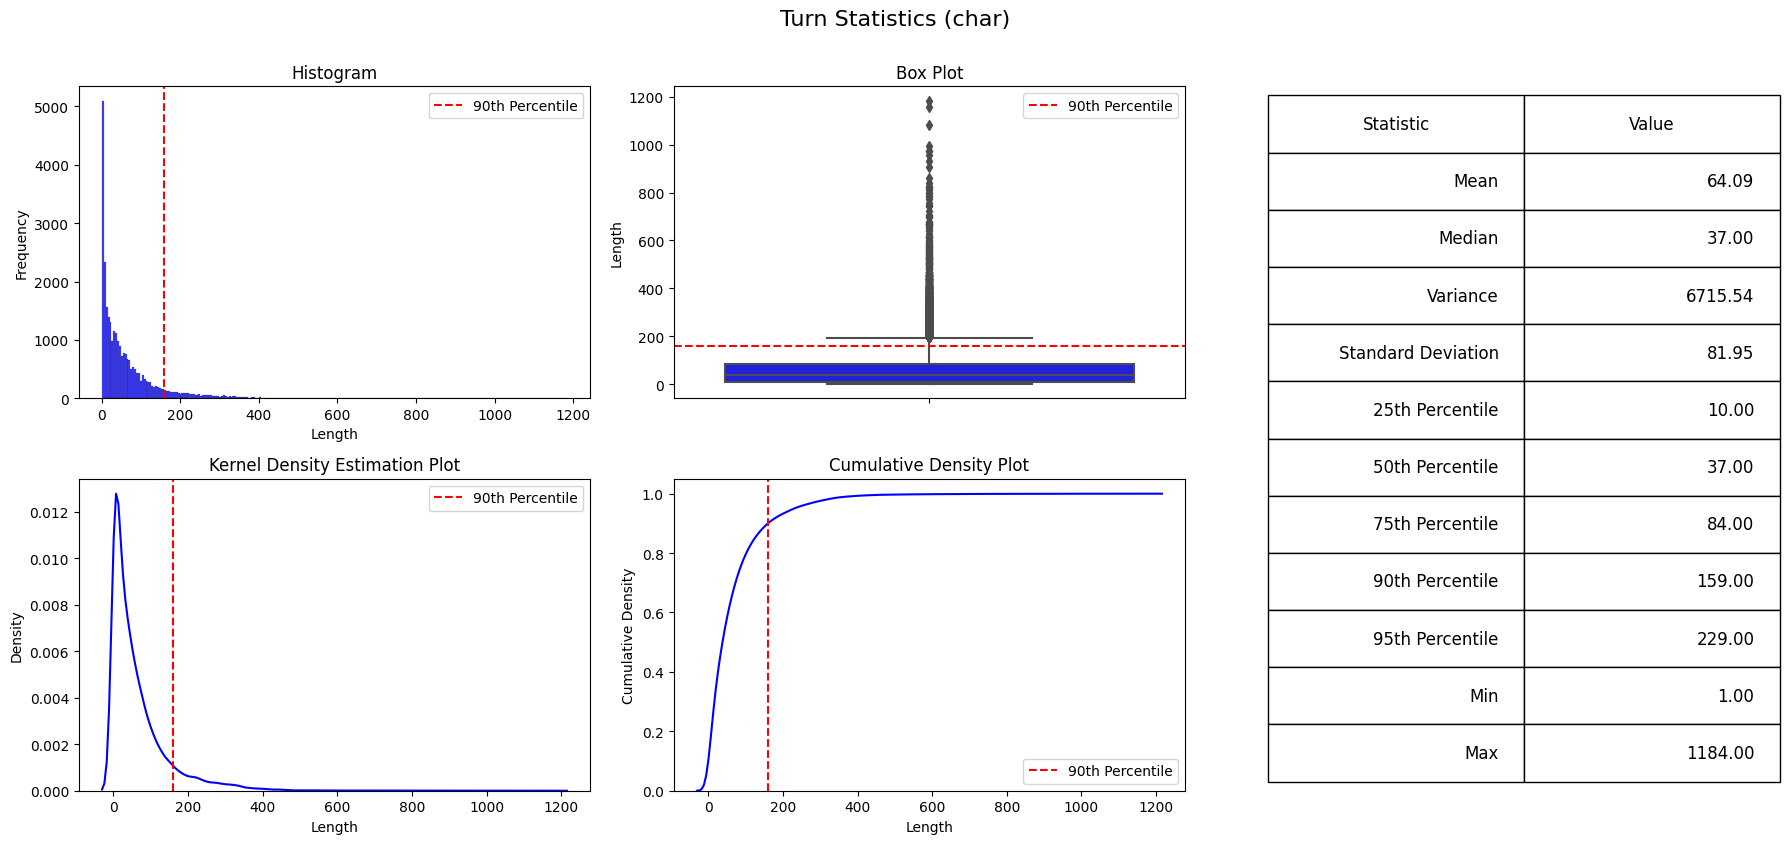

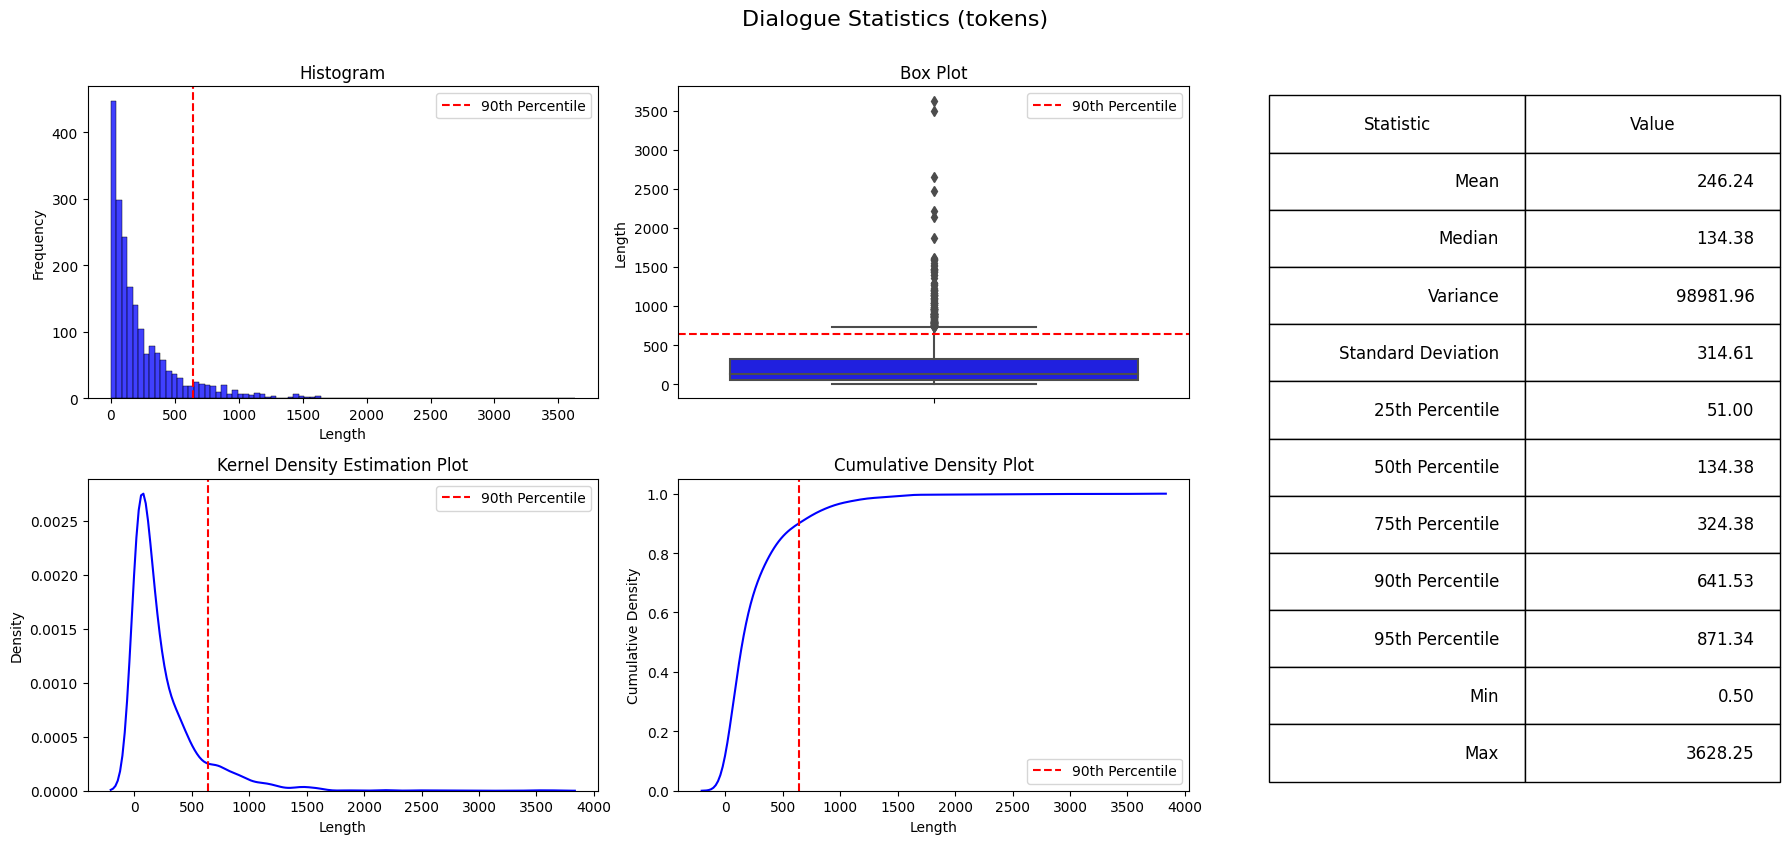

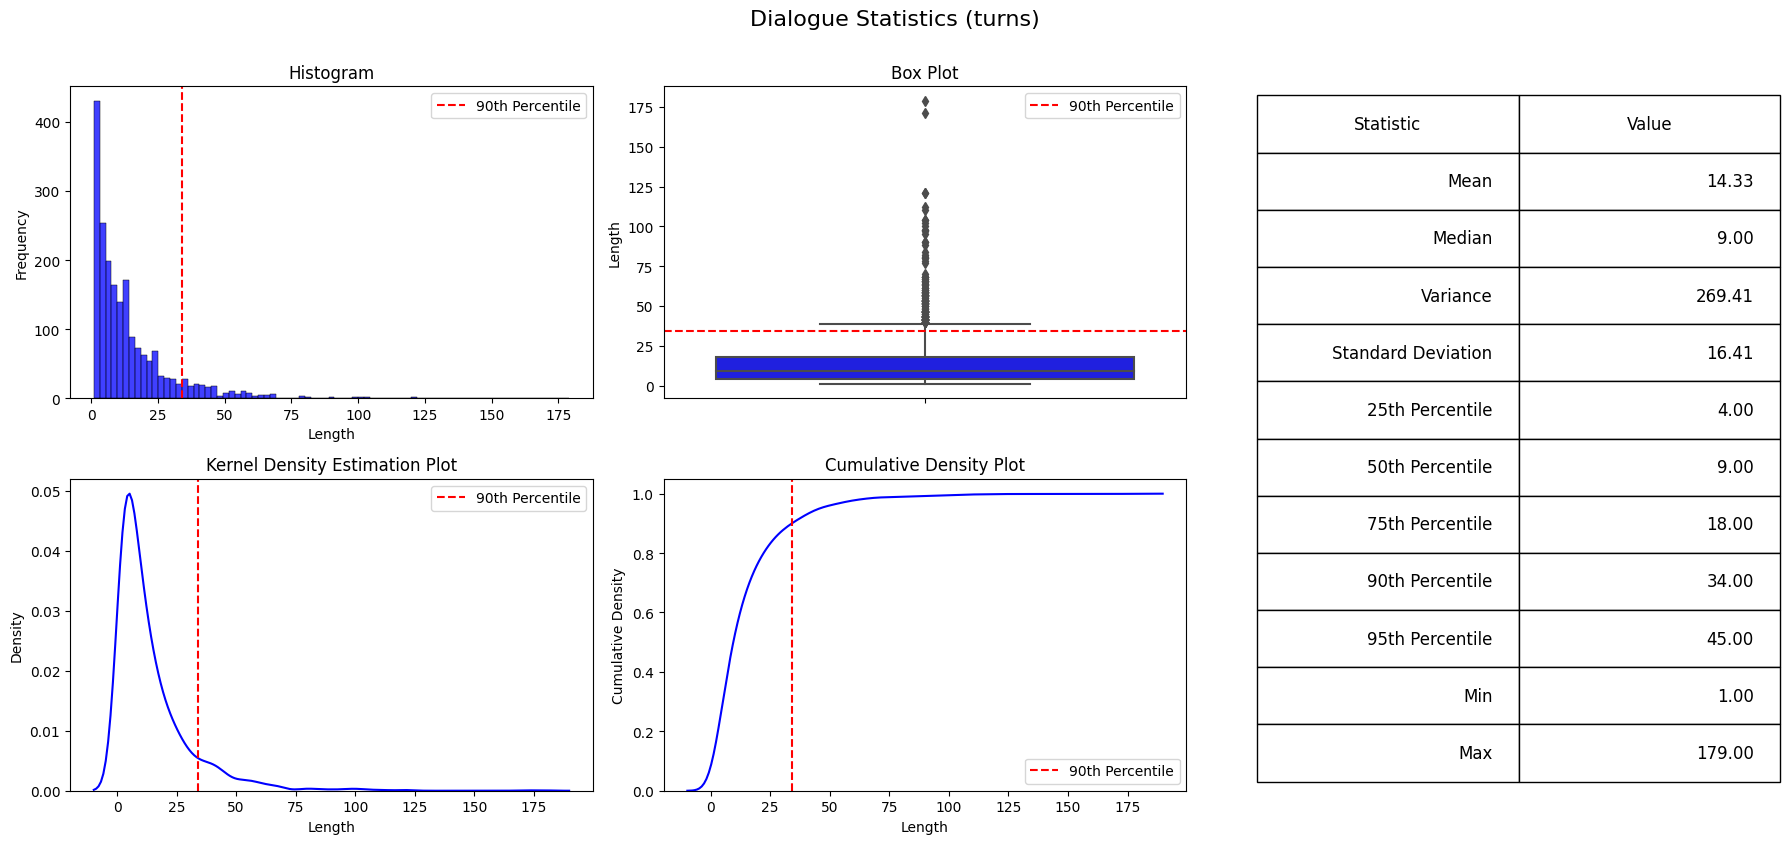

In [46]:
from data import get_DYDA, get_SWDA, get_KPN
from plot_distributions import array_statistics

train, test = get_KPN()

turn_lengths = []
for dialogue in train[0]:
    for turn in dialogue:
        turn_length = len(turn)
        turn_lengths.append(turn_length)


dialogue_lengths = []
for dialogue in train[0]:
    concat_dialogue = "[SEP]".join(dialogue)
    dialogue_lengths.append(len(concat_dialogue) / 4)

dialogue_lengths_turns = []
for dialogue in train[0]:
    dialogue_lengths_turns.append(len(dialogue))

_ = array_statistics(turn_lengths, "Turn Statistics (char)")
_ = array_statistics(dialogue_lengths, "Dialogue Statistics (tokens)")
_ = array_statistics(dialogue_lengths_turns, "Dialogue Statistics (turns)")

In [4]:
len(train[0]), len(test[0])

(11118, 1000)